In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


filename = 'Data/Data_Train.xlsx'
data_train = pd.read_excel(filename)
data_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [3]:

data_train['Reviews'] = data_train.Reviews.apply(lambda e: float(e.split()[0]))
data_train['Ratings']= data_train.Ratings.str.extract('(\d+)')
data_train["Ratings"] = data_train.Ratings.astype(float)



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8146/1278537048.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_train['Ratings']= data_train.Ratings.str.extract('(\d+)')


In [4]:

data_train['BookCategory'].nunique(), data_train['Genre'].nunique(), data_train['Author'].nunique(), data_train.Title.nunique()

(11, 345, 3679, 5568)

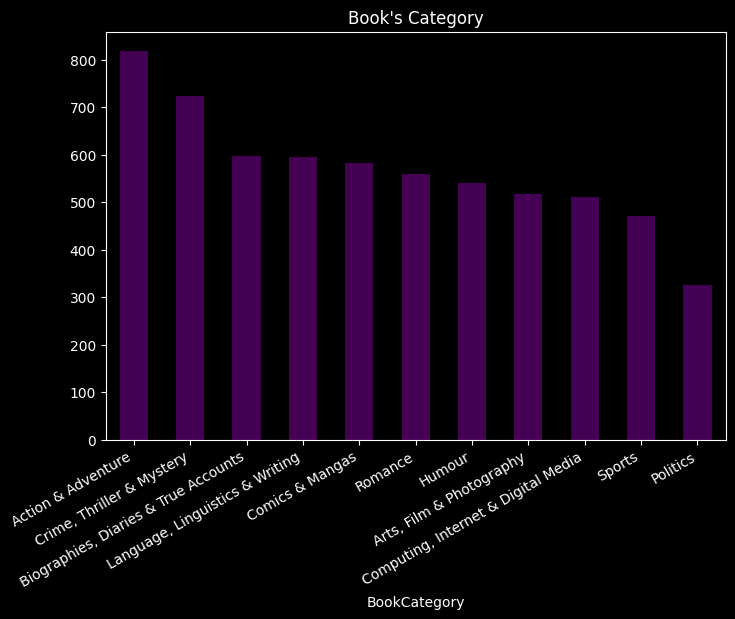

In [5]:

fig,ax= plt.subplots(figsize=(8,6))
data_train['BookCategory'].value_counts().plot(kind = 'bar', colormap='viridis' )
plt.title("Book's Category")
fig.autofmt_xdate()

In [6]:
data_train['BookCategory'] = data_train.BookCategory.astype('category')
data_train['Author'] = data_train.Author.astype('category')
data_train['Genre'] = data_train.Genre.astype('category')
data_train['Title'] = data_train.Genre.astype('category')
data_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         6237 non-null   category
 1   Author        6237 non-null   category
 2   Edition       6237 non-null   object  
 3   Reviews       6237 non-null   float64 
 4   Ratings       6237 non-null   float64 
 5   Synopsis      6237 non-null   object  
 6   Genre         6237 non-null   category
 7   BookCategory  6237 non-null   category
 8   Price         6237 non-null   float64 
dtypes: category(4), float64(3), object(2)
memory usage: 466.2+ KB


In [7]:
data_train['Edition_Year'] = data_train['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else '0')
data_train["Edition_Year"] = data_train.Edition_Year.astype(int)

In [8]:
data_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year
0,Action & Adventure (Books),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016
1,Cinema & Broadcast (Books),Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012
2,International Relations,Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982
3,Contemporary Fiction (Books),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017
4,Photography Textbooks,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006
...,...,...,...,...,...,...,...,...,...,...
6232,Anthropology (Books),Tom Phillips,"Paperback,– 8 Aug 2018",5.0,2.0,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00,2018
6233,Contemporary Fiction (Books),Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3,9.0,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,2016
6234,Romance (Books),Julia Quinn,"Paperback,– 8 Jun 2006",3.8,3.0,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00,2006
6235,Action & Adventure (Books),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5,4.0,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00,2015


In [9]:

data_train = data_train.drop(['Edition', 'Synopsis'], axis=1)

In [10]:
data_train.head()

,Title,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
0,Action & Adventure (Books),Chris Kuzneski,4.0,8.0,Action & Adventure (Books),Action & Adventure,220.00,2016
1,Cinema & Broadcast (Books),Arun Khopkar,3.9,14.0,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012
2,International Relations,Thomas Hobbes,4.8,6.0,International Relations,Humour,299.00,1982
3,Contemporary Fiction (Books),Agatha Christie,4.1,13.0,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017
4,Photography Textbooks,Editors of Life,5.0,1.0,Photography Textbooks,"Arts, Film & Photography",965.62,2006


In [11]:
data_train.describe()

,Reviews,Ratings,Price,Edition_Year
count,6237.000000,6237.000000,6237.000000,6237.000000
mean,4.293202,29.828122,560.707516,2005.101972
std,0.662501,84.139256,690.110657,116.821510
min,1.000000,1.000000,25.000000,0.000000
25%,4.000000,2.000000,249.180000,2010.000000
50%,4.400000,6.000000,373.000000,2014.000000
75%,4.800000,21.000000,599.000000,2017.000000
max,5.000000,973.000000,14100.000000,2019.000000


In [12]:
data_train.Edition_Year.value_counts()

Edition_Year
2018    811
2017    757
2016    659
2015    519
2014    402
2013    388
2019    361
2012    304
2011    267
2010    235
2009    182
2008    163
2005    125
2006    110
2007    108
2003     99
2004     85
2002     72
2000     69
2001     66
1999     39
1997     33
1994     33
1992     31
1998     31
1995     30
1996     27
1993     22
0        21
1989     20
1991     19
1986     16
1988     15
1984     15
1982     14
1990     14
1987     13
1985     10
1983     10
1976      6
1980      5
1975      4
1971      4
1964      3
1977      3
1974      3
1960      2
1979      2
1978      2
1969      1
1981      1
1970      1
1905      1
1900      1
1961      1
1925      1
1973      1
Name: count, dtype: int64

In [13]:
data_train.Edition_Year = data_train.Edition_Year.replace(0, 2005)

In [14]:

import pickle
from sklearn.preprocessing import LabelEncoder

encoders = {
    'Title': LabelEncoder(),
    'Author': LabelEncoder(),
    'Genre': LabelEncoder(),
    'BookCategory': LabelEncoder()
}

# Ajustar los LabelEncoders en el conjunto de datos de entrenamiento
data_train['Title'] = encoders['Title'].fit_transform(data_train['Title'])
data_train['Author'] = encoders['Author'].fit_transform(data_train['Author'])
data_train['Genre'] = encoders['Genre'].fit_transform(data_train['Genre'])
data_train['BookCategory'] = encoders['BookCategory'].fit_transform(data_train['BookCategory'])


data_train.head()

,Title,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
0,1,615,4.0,8.0,1,0,220.00,2016
1,74,307,3.9,14.0,74,2,202.93,2012
2,193,3390,4.8,6.0,193,6,299.00,1982
3,92,62,4.1,13.0,92,5,180.00,2017
4,253,953,5.0,1.0,253,1,965.62,2006


In [15]:
# Guardar los LabelEncoders en un archivo pkl
with open('models/encoders.pkl', 'wb') as enc_file:
    pickle.dump(encoders, enc_file)

print("Encoders guardados exitosamente en 'models/encoders.pkl'")

Encoders guardados exitosamente en 'models/encoders.pkl'


In [39]:
data_train.describe()

,Title,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,136.275453,1795.325317,4.293202,29.828122,136.275453,4.627385,560.707516,2011.852814
std,103.891373,1058.152146,0.662501,84.139256,103.891373,3.169320,690.110657,7.918249
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,25.000000,1900.000000
25%,34.000000,893.000000,4.000000,2.000000,34.000000,2.000000,249.180000,2010.000000
50%,103.000000,1787.000000,4.400000,6.000000,103.000000,5.000000,373.000000,2014.000000
75%,218.000000,2699.000000,4.800000,21.000000,218.000000,7.000000,599.000000,2017.000000
max,344.000000,3678.000000,5.000000,973.000000,344.000000,10.000000,14100.000000,2019.000000


In [17]:
matrix_corr = data_train.corr()

matrix_corr

,Title,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
Title,1.000000,0.008517,-0.000574,-0.014876,1.000000,0.413287,0.061064,-0.002599
Author,0.008517,1.000000,-0.015712,-0.009825,0.008517,-0.003658,-0.002670,0.010955
Reviews,-0.000574,-0.015712,1.000000,-0.009644,-0.000574,-0.045656,0.108373,0.005428
Ratings,-0.014876,-0.009825,-0.009644,1.000000,-0.014876,-0.019665,-0.101145,0.030023
Genre,1.000000,0.008517,-0.000574,-0.014876,1.000000,0.413287,0.061064,-0.002599
BookCategory,0.413287,-0.003658,-0.045656,-0.019665,0.413287,1.000000,-0.011616,0.027368
Price,0.061064,-0.002670,0.108373,-0.101145,0.061064,-0.011616,1.000000,-0.025385
Edition_Year,-0.002599,0.010955,0.005428,0.030023,-0.002599,0.027368,-0.025385,1.000000


In [18]:
matrix_corr.Price.sort_values()


Ratings        -0.101145
Edition_Year   -0.025385
BookCategory   -0.011616
Author         -0.002670
Genre           0.061064
Title           0.061064
Reviews         0.108373
Price           1.000000
Name: Price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

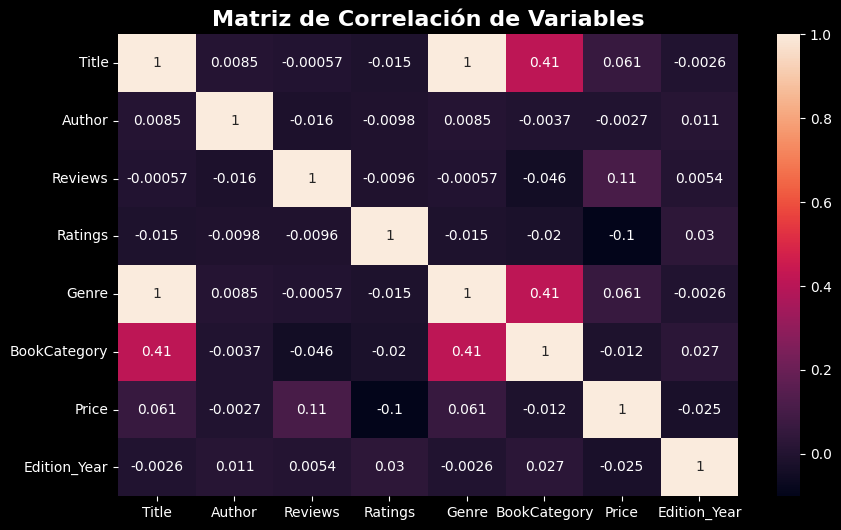

In [19]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(matrix_corr, annot=True)
plt.title('Matriz de Correlación de Variables', fontsize=16, fontweight='bold')

plt.show


In [21]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()


data_normalizer = normalizer.fit_transform(data_train)



In [22]:
y = data_normalizer[:,7]
X = np.delete(data_normalizer, 7, axis=1)

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NameError: name 'X' is not defined

In [24]:
from sklearn.model_selection import  GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [25]:
rf_model = RandomForestRegressor(random_state=random_state)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END max_depth=10, min_sample

/home/dev/Documents/Github/BookPrice/Book_Price/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [26]:
print("Mejores Parámetros:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

train_score = best_rf_model.score(X_train, y_train)
test_score = best_rf_model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)



Mejores Parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train Score: 0.9996007722587963
Test Score: 0.9979366302464464


In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_rf_model, X, y, cv=kf) 

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.99645848 0.99756153 0.99773778 0.99641972 0.99750647]
Mean Cross-Validation Score: 0.9971367968980038


In [28]:
predictions = best_rf_model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("MAE:", mae(y_true= y_test, y_pred= predictions),"  RMSE:", mse(y_true= y_test, y_pred= predictions, squared=False))

MAE: 0.003590416541162099   RMSE: 0.007479993018979801


/home/dev/Documents/Github/BookPrice/Book_Price/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'True Values')

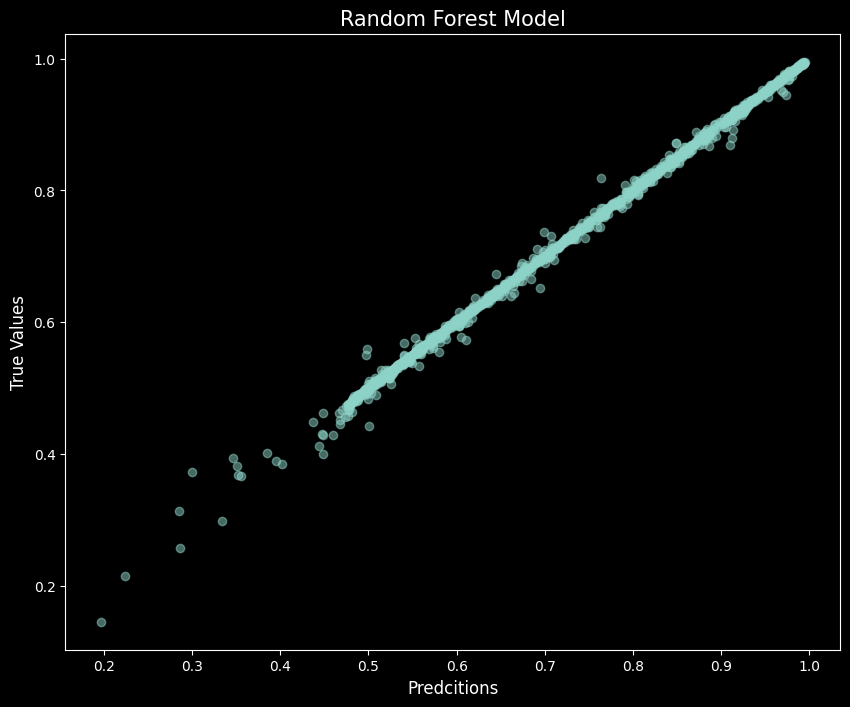

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test, alpha= 0.5)
plt.title('Random Forest Model', fontsize = 15
          )
plt.xlabel('Predcitions', fontsize= 12)
plt.ylabel('True Values', fontsize= 12)


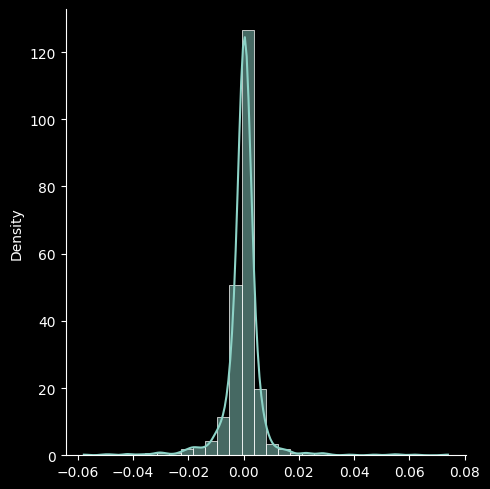

In [31]:
residuos = y_test - predictions
sns.displot(residuos, bins=30, kde=True, stat="density", linewidth=0.5)

In [32]:
features = best_rf_model.feature_importances_
features

array([8.24144334e-04, 7.95387461e-01, 3.21457157e-02, 1.46987195e-03,
       7.96317812e-04, 5.99076355e-04, 1.68777413e-01])

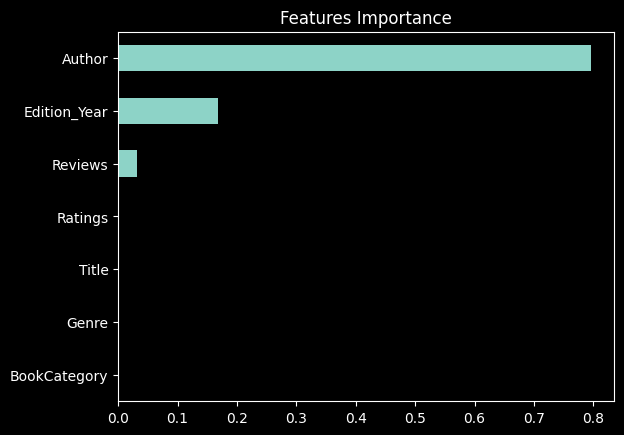

In [33]:
feat_importance = pd.Series(features,
                            index=data_train.drop(['Price'], axis=1).columns)
figure = feat_importance.sort_values(ascending=True).plot(kind='barh', title= 'Features Importance')
plt.show()


In [35]:
file = open('rf_model.pkl', 'wb')
pickle.dump(best_rf_model, file)